# Unsupervised Learning

Most machine learning applications today rely on supervised learning, attracting most investments; however, the majority of available data is unlabeled: **we have input features X, but no labels y.**

The computer scientist Yann LeCun famously stated that “**if intelligence was a cake, unsupervised learning would be the cake**, supervised learning the icing, and reinforcement learning the cherry.” This highlights the vast potential of unsupervised learning that we have only just begun to explore.

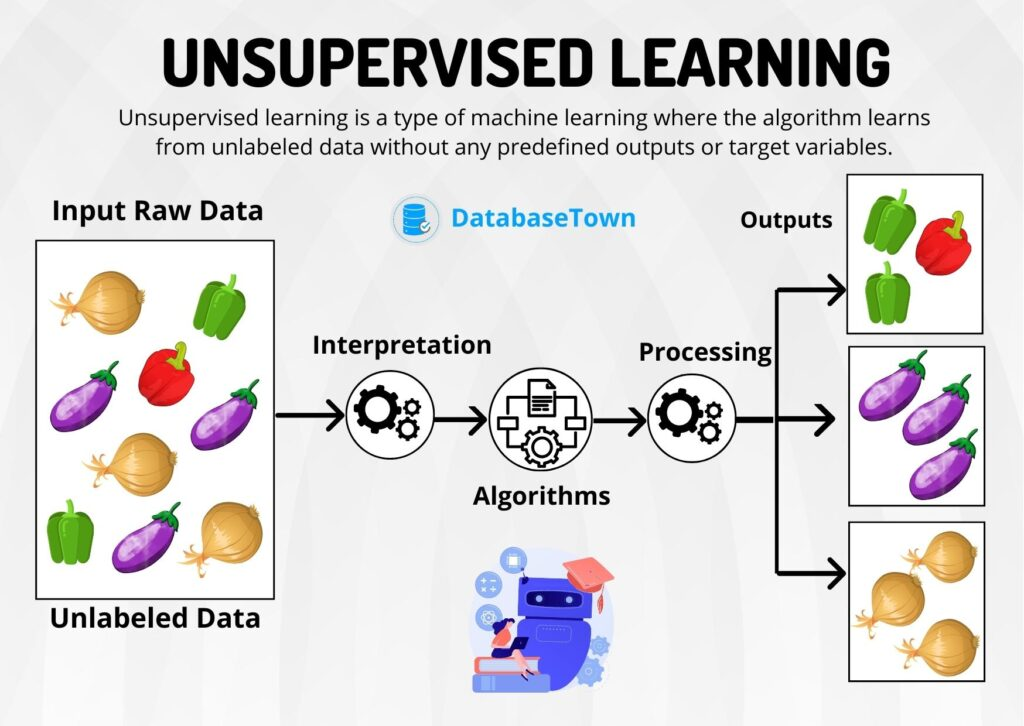


**The most common unsupervised learning task**

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20251101122126638001/types_of_machine_learning.webp"/>

**Clustering**

The goal is to **group similar instances** into clusters. It's useful for data analysis, customer segmentation, recommender systems, and more.

**Anomaly Detection**

This involves learning what “normal” data looks like to **identify abnormal instances, known as anomalies or outliers**. It's valuable for fraud detection, quality control in manufacturing, and improving model performance by removing outliers.

**Density Estimation**

This task **estimates the probability density function (PDF) of a dataset**. It's often used for anomaly detection, as low-density instances are likely anomalies, and is helpful for data analysis and visualization.

## Clustering

Just like in classification, **each instance gets assigned to a group. However, unlike classification, clustering is an unsupervised task.**

Consider **on the left is the iris dataset**, where each instance’s species (i.e., its class) is represented with a different marker. It is a labeled dataset, for which classification algorithms such as logistic regression, SVMs, or random forest classifiers are well suited.

**On the right is the same dataset, but without the labels**, so you cannot use a classification algorithm anymore. This is where clustering algorithms step in: many of them can easily detect the lower-left cluster. It is also quite easy to see with our own eyes, but it is not so obvious that the upper-right cluster is composed of two distinct subclusters.

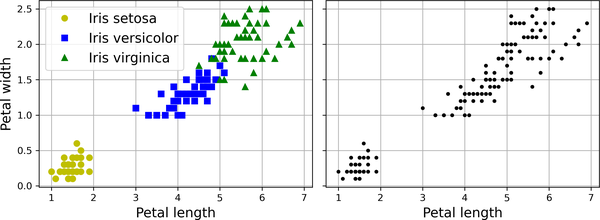

**Clustering Applications**

* Customer Segmentation

Group customers based on purchases and website activity to tailor products and marketing.

* Data Analysis

Use clustering to analyze different groups within a new dataset.

* Dimensionality Reduction

Replace each instance's features with its cluster affinities, reducing dimensionality while retaining important information.

* Feature Engineering

Use cluster affinities as additional features to improve model performance.

* Anomaly Detection

Identify anomalies as instances with low affinity to all clusters, such as unusual user behavior.

* Semi-Supervised Learning

Cluster data to propagate a few labels to all instances in the same cluster, increasing labeled data for supervised learning.

* Search Engines

Cluster images to find similar ones based on a reference image.

* Image Segmentation

Cluster pixels by color and replace each pixel's color with the average of its cluster, simplifying object detection and tracking.

**There is no universal definition of a cluster**; it varies by context, and different algorithms identify different types of clusters. Some algorithms focus on instances around a ***central point (centroid)***, while others find densely packed regions that can have any shape. Additionally, some algorithms are hierarchical, identifying clusters within clusters.

### **k-means**

K-means clustering is a popular unsupervised machine learning algorithm used to **partition data into k clusters based on their similarities.**

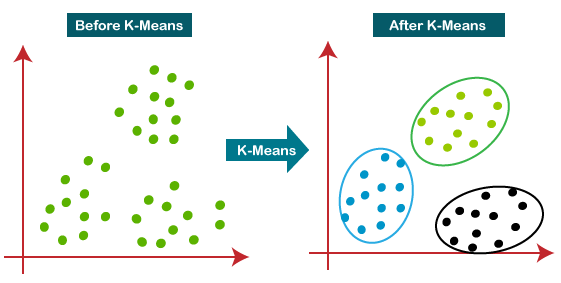

***How K-Means Works***

K-means clustering **works by initializing k centroids randomly**, then repeating two steps until convergence: assigning instances to clusters based on their Euclidean distance to each centroid, and updating the centroids by computing the mean of the instances in each cluster. The algorithm is guaranteed to converge in a finite number of steps, usually quite small, and the final result is a set of clusters with their centroids.



***Choosing the Number of Clusters***

The **number of clusters k is a hyperparameter that needs to be specified before running the algorithm.** A **common approach to choose k is to use the elbow method**, which involves running k-means clustering on the dataset for a range of different values of k and selecting the value that maximizes the amount of information gained and minimizes the amount of variance in each cluster.


***Examples in Python - 1***

Here is an example of k-means clustering in Python using the scikit-learn library:

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Create a sample dataset
X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])

# Create a k-means model with k=3
kmeans = KMeans(n_clusters=3)

# Fit the model to the data
kmeans.fit(X)

# Print the cluster labels
print(kmeans.labels_)

[0 2 0 1 1 1]


This code creates a sample dataset with 6 instances, creates a k-means model with k=3, fits the model to the data, and prints the cluster labels.

***Examples in Python - 2***

In [1]:
from sklearn.cluster import KMeans
import numpy as np


# Create a random dataset
X = np.random.rand(100, 2)



In [ ]:
# Create a KMeans object with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the KMeans object to the dataset
kmeans.fit(X)

# Print the cluster centers
print("Cluster Centers:\n", kmeans.cluster_centers_)

Cluster Centers:
 [[0.75953804 0.44240828]
 [0.28813117 0.22445002]
 [0.2882806  0.80690703]]


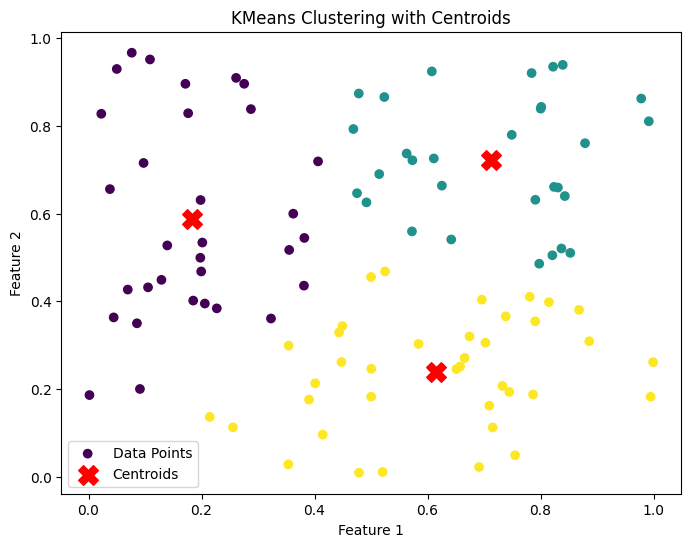

In [ ]:
import matplotlib.pyplot as plt

# Visualize the data points and centroids
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', marker='o', label='Data Points')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='X', s=200, label='Centroids')  # Centroids in red
plt.title('KMeans Clustering with Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

**k-means algorithm**

There is an algorithm that **tries to minimize the distance of the points in a cluster** with their centroid – the k-means clustering technique.

The main objective of the K-Means algorithm is to **minimize the sum of distances between the points** and their respective cluster centroid.

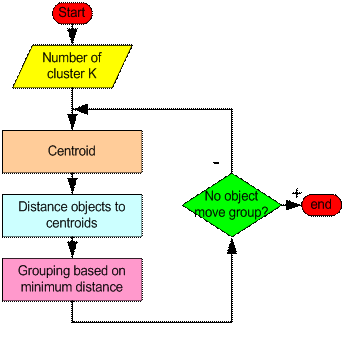

**Initialization:** Start by randomly selecting K points from the dataset. These points will act as the initial cluster centroids.

**Assignment:**  For each data point in the dataset, calculate the distance between that point and each of the K centroids. Assign the data point to the cluster whose centroid is closest to it. This step effectively forms K clusters.

**Update centroids:** Once all data points have been assigned to clusters, recalculate the centroids of the clusters by taking the mean of all data points assigned to each cluster.

**Repeat:** Repeat steps 2 and 3 until convergence. Convergence occurs when the centroids no longer change significantly or when a specified number of iterations is reached.

**Final Result:** Once convergence is achieved, the algorithm outputs the final cluster centroids and the assignment of each data point to a cluster.

**How to choose the value of "K number of clusters" in K-means Clustering?**

The performance of the K-means clustering algorithm depends upon highly efficient clusters that it forms. But choosing the optimal number of clusters is a big task. There are some different ways to find the optimal number of clusters, but here we are discussing the most appropriate method to find the number of clusters or value of K. The method is given below:

***Elbow Method***

The Elbow method is one of the most popular ways to find the optimal number of clusters. This method uses the concept of WCSS value. **WCSS stands for Within Cluster Sum of Squares**, which defines the total variations within a cluster. The formula to calculate the value of WCSS (for 3 clusters) is given below:

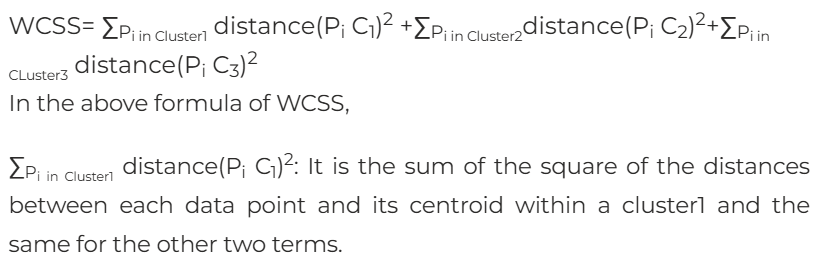

To find the optimal value of clusters, the elbow method follows the below steps:

* It executes the K-means clustering on a given dataset for different K values (ranges from 1-10).
* For each value of K, calculates the WCSS value.
* Plots a curve between calculated WCSS values and the number of clusters K.
* The sharp point of bend or a point of the plot looks like an arm, then that point is considered as the best value of K.

Since the graph shows the sharp bend, which looks like an elbow, hence it is known as the elbow method. The graph for the elbow method looks like the below image:

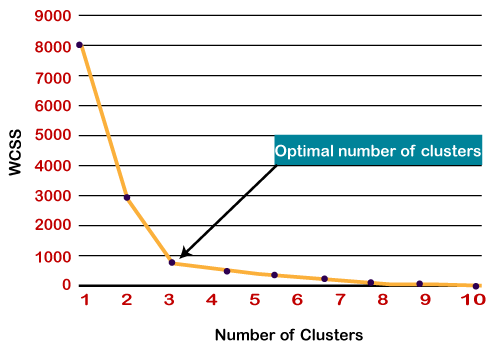

###**Python Implementation of K-means Clustering Algorithm**

Before implementation, let's understand what type of problem we will solve here. So, we have a dataset of **Mall_Customers**, which is the data of customers who visit the mall and spend there.

In the given dataset, we have *Customer_Id, Gender, Age, Annual Income ($), and Spending Score* (which is the calculated value of how much a customer has spent in the mall, the more the value, the more he has spent). **From this dataset, we need to calculate some patterns**, as it is an unsupervised method, so we don't know what to calculate exactly.

The steps to be followed for the implementation are given below:

* Data Pre-processing
* Finding the optimal number of clusters using the elbow method
* Training the K-means algorithm on the training dataset
* Visualizing the clusters

**Step-1: Data pre-processing Step**

In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Importing the Dataset
df = pd.read_csv('https://raw.githubusercontent.com/kennedykwangari/Mall-Customer-Segmentation-Data/refs/heads/master/Mall_Customers.csv')

In [ ]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


We are **extracting only 3rd and 4th feature**. It is because we need a 2d plot to visualize the model, and some features are not required, such as customer_id.

In [ ]:
data_X = df.iloc[:,3:5]
data_X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Text(0, 0.5, 'Spending Score')

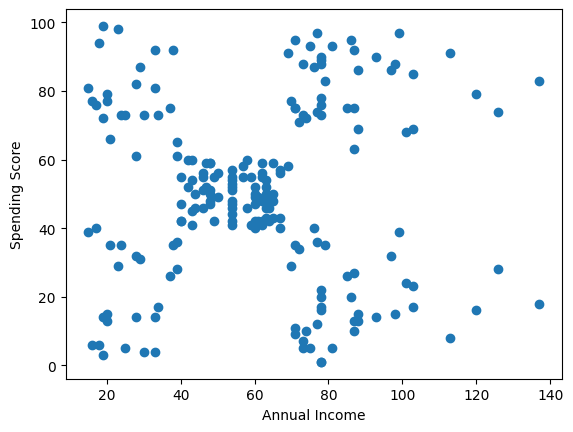

In [ ]:
plt.scatter(data_X["Annual Income (k$)"],data_X["Spending Score (1-100)"])
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")

**Step-2: Finding the optimal number of clusters using the elbow method**

In the second step, we will try to find the optimal number of clusters for our clustering problem. So, as discussed above, here we are going to use the elbow method for this purpose.

As we know, the **elbow method uses the WCSS concept to draw the plot by plotting WCSS values on the Y-axis and the number of clusters on the X-axis.** So we are going to calculate the value for WCSS for different k values ranging from 1 to 10. Below is the code for it:

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(2,11):
    model = KMeans(n_clusters = i)
    model.fit(data_X)
    wcss.append(model.inertia_)

print("WCSS : \n",wcss)

WCSS : 
 [269981.28000000014, 181363.59595959607, 132087.72428243395, 73880.64496247198, 44448.45544793369, 40830.14320219253, 32201.16657786657, 26676.78076960076, 21996.523372372296, 22686.04926918958]


**Explaination:**

***kmeans.inertia_*** is a term used in the KMeans clustering algorithm that measures how tightly the data points in the clusters are packed together. Specifically, it represents the sum of the squared distances between each data point and its assigned cluster centroid.

***A lower inertia_ value indicates that the clusters are more compact and better separated from each other.*** Therefore, inertia_ can be used to evaluate the quality of the clustering; generally, lower inertia_ values suggest better clustering performance.

**It is often used in the "elbow method" to determine the optimal number of clusters** by plotting the inertia against the number of clusters and looking for a point where the rate of decrease sharply changes.

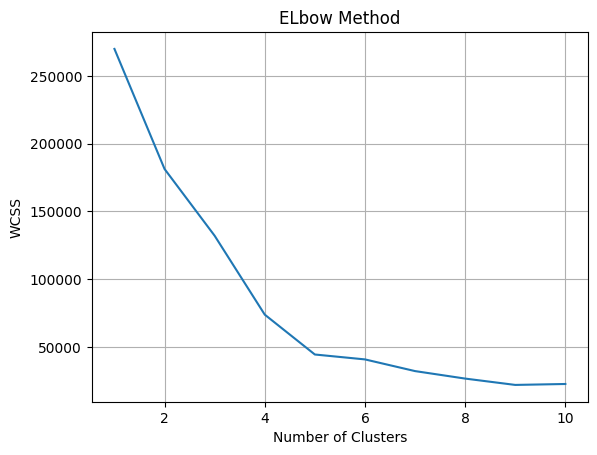

In [ ]:
plt.plot(list(range(2,11)),wcss)
plt.title("ELbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid()

From the above plot, we can see the elbow point is at 5. **So the number of clusters here will be 5.**

**Step- 3: Training the K-means algorithm on the training dataset**

To train the model, we will use the same two lines of code as we have used in the above section, but here instead of using i, we will use 5, as we know there are 5 clusters that need to be formed.

In [ ]:
model = KMeans(n_clusters=5)
model.fit(data_X)

KMeans(n_clusters=5)

In [ ]:
pred = model.predict(data_X)
pred

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 4,
       1, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 3, 4, 3, 2, 3, 2, 3,
       4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

The first line is the same as above for creating the object of KMeans class.

In the second line of code, we have created the dependent variable y_pred to train the model.

In [ ]:
data_X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


**Step-4: Visualizing the Clusters**

The last step is to visualize the clusters. As we have 5 clusters for our model, so we will visualize each cluster one by one.

To visualize the clusters will use scatter plot using scatter() function of matplotlib.

In [ ]:
centers = model.cluster_centers_
print(centers)

[[25.72727273 79.36363636]
 [26.30434783 20.91304348]
 [88.2        17.11428571]
 [86.53846154 82.12820513]
 [55.2962963  49.51851852]]


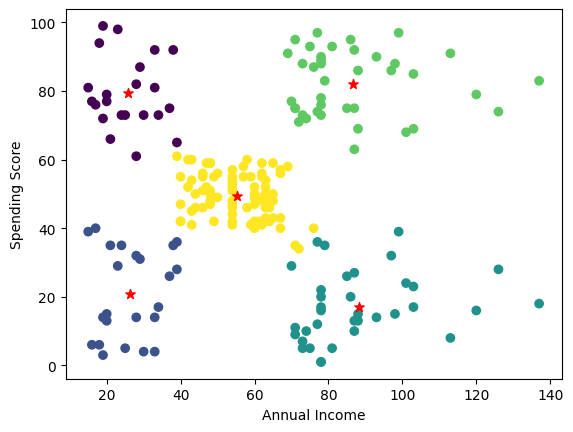

In [ ]:
plt.scatter(data_X["Annual Income (k$)"],data_X["Spending Score (1-100)"],c=y_pred)
plt.scatter(centers[:,0:1],centers[:,1:],color='red',marker="*",s=50)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

In [ ]:
x=x=df.iloc[:,3:5].values

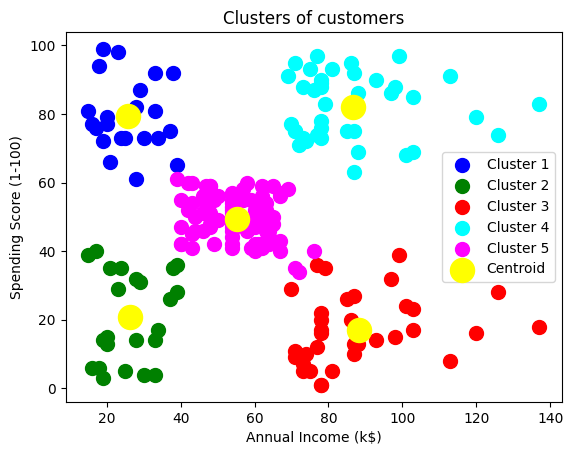

In [ ]:
#visulaizing the clusters
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster
plt.scatter(x[y_pred== 2, 0], x[y_pred == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster
plt.scatter(x[y_pred == 3, 0], x[y_pred == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster
plt.scatter(x[y_pred == 4, 0], x[y_pred == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

The output image is clearly showing the five different clusters with different colors. The clusters are formed between two parameters of the dataset; Annual income of customer and Spending. We can change the colors and labels as per the requirement or choice. We can also observe some points from the above patterns, which are given below:

Cluster1 shows the customers with low income with very high spending so they can be categorized as **careless**.

Cluster2 shows the low income and also low spending so they can be categorized as **sensible.**

Cluster3 shows the customer has a high income but low spending, so we can categorize them as **careful**.

Cluster4 shows the customers with high income and high spending so they can be categorized as **target**, and these customers can be the **most profitable** customers for the mall owner.

Cluster5 shows the customers with average salary and average spending so we can categorize these customers as **average**.